In [2]:
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error #不太靠谱 太劲大求了。差的平方的均值
from sklearn.metrics import explained_variance_score #越小代表结果越差
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
X = pd.read_excel('./input1.xlsx')
X['dayofyear'] = X['日期'].apply(lambda x : x.dayofyear)
X['year'] = X['日期'].apply(lambda x : x.year)
X['dayofweeek'] =  X['日期'].apply(lambda x: x.dayofweek)
X['dayofmonth'] = X['日期'].apply(lambda x: x.day)
X.head()

c:\python3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,日期,星期,月份,四季,最高气温,最低气温,平均气温,温度等级,天气,转天气,...,CO,NO2,O3_8h,程度,节假日,总供水量,dayofyear,year,dayofweeek,dayofmonth
0,2015-11-03,星期二,11,冬,21,13,17.0,舒适,多云,多云,...,1.4,84,112,轻度污染,上班,4363379,307,2015,1,3
1,2015-11-04,星期三,11,冬,21,16,18.5,舒适,小雨,小雨,...,0.8,55,67,良,上班,4730486,308,2015,2,4
2,2015-11-05,星期四,11,冬,24,18,21.0,舒适,多云,多云,...,0.8,58,64,良,上班,4488866,309,2015,3,5
3,2015-11-06,星期五,11,冬,24,19,21.5,舒适,小雨,小雨,...,0.6,34,75,优,上班,4546968,310,2015,4,6
4,2015-11-07,星期六,11,冬,25,16,20.5,舒适,雷阵雨,阵雨,...,1.1,39,48,良,周末,4344288,311,2015,5,7


In [3]:
base = X[['总供水量','year','月份']].groupby(by = ['year','月份']).agg(['mean','std'])
base.columns = base.columns.droplevel(0)
base = base.reset_index()
base['base_1_mean'] = base['mean'].shift(1)
base['base_1_std'] = base['std'].shift(1)
base['base_2_mean'] = base['mean'].shift(2)
base['base_2_std'] = base['std'].shift(2)

In [4]:
X_deal = pd.merge(X,base[['year','月份','base_1_mean','base_1_std','base_2_mean','base_2_std']],how = 'inner',on = ['year','月份'])

In [5]:
X_deal2 = X_deal[~pd.isnull(X_deal['base_2_mean'])]

In [215]:
X_deal2

,日期,星期,月份,四季,最高气温,最低气温,平均气温,温度等级,天气,转天气,...,节假日,总供水量,dayofyear,year,dayofweeek,dayofmonth,base_1_mean,base_1_std,base_2_mean,base_2_std
59,2016-01-01,星期五,1,冬,12,2,7.0,较低温,晴,多云,...,元旦,4333799,1,2016,4,1,4.174048e+06,83414.143541,4.359680e+06,223616.245969
60,2016-01-02,星期六,1,冬,16,8,12.0,较低温,多云,小雨,...,元旦,4203537,2,2016,5,2,4.174048e+06,83414.143541,4.359680e+06,223616.245969
61,2016-01-03,星期日,1,冬,16,9,12.5,较低温,小雨,小雨,...,元旦,4237709,3,2016,6,3,4.174048e+06,83414.143541,4.359680e+06,223616.245969
62,2016-01-04,星期一,1,冬,15,9,12.0,较低温,小雨,大雨,...,上班,4317735,4,2016,0,4,4.174048e+06,83414.143541,4.359680e+06,223616.245969
63,2016-01-05,星期二,1,冬,11,9,10.0,较低温,小雨,小雨,...,上班,4248879,5,2016,1,5,4.174048e+06,83414.143541,4.359680e+06,223616.245969
64,2016-01-06,星期三,1,冬,11,5,8.0,较低温,小雨,多云,...,上班,4285165,6,2016,2,6,4.174048e+06,83414.143541,4.359680e+06,223616.245969
65,2016-01-07,星期四,1,冬,10,3,6.5,较低温,小雨,阴,...,上班,4376131,7,2016,3,7,4.174048e+06,83414.143541,4.359680e+06,223616.245969
66,2016-01-08,星期五,1,冬,8,2,5.0,低温,多云,多云,...,上班,4419674,8,2016,4,8,4.174048e+06,83414.143541,4.359680e+06,223616.245969
67,2016-01-09,星期六,1,冬,9,4,6.5,较低温,多云,多云,...,周末,4466667,9,2016,5,9,4.174048e+06,83414.143541,4.359680e+06,223616.245969
68,2016-01-10,星期日,1,冬,12,8,10.0,较低温,小雨,小雨,...,周末,4299772,10,2016,6,10,4.174048e+06,83414.143541,4.359680e+06,223616.245969


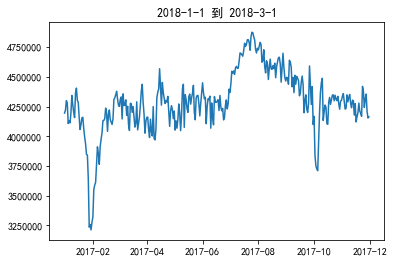

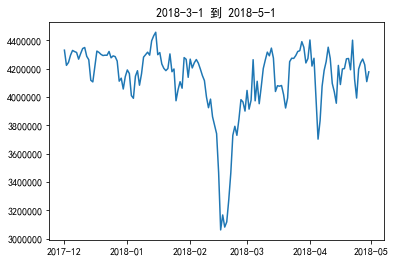

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
trend = X[(X['日期']>='2017-1-1')&(X['日期']<'2017-12-1')]
plt.plot(trend['日期'],trend['总供水量'])
plt.title('2018-1-1 到 2018-3-1')
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
plt.show()
trend2 = X[(X['日期']>='2017-12-1')&(X['日期']<'2018-5-1')]
plt.plot(trend2['日期'],trend2['总供水量'])
plt.title('2018-3-1 到 2018-5-1')
plt.show()

In [216]:
y = X_deal2.pop('总供水量')
drop = ['日期','PM2.5','PM10','SO2','CO','NO2','O3_8h','星期']
X_deal2.drop(drop,axis = 1,inplace = True)
X_input = pd.get_dummies(X_deal2)
X_train,X_test,y_train,y_test = train_test_split(X_input,y,test_size = 0.2)

c:\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


pd.DatetimeIndex(input_dummy['日期']).dayofweek

In [129]:
X_input.columns

Index(['月份', '最高气温', '最低气温', '平均气温', '空气质量指数', 'dayofyear', 'year',
       'dayofweeek', 'dayofmonth', '四季_冬', '四季_夏', '四季_春', '四季_秋', '温度等级_低温',
       '温度等级_舒适', '温度等级_较低温', '温度等级_较高温', '温度等级_高温', '天气_中雨', '天气_多云', '天气_大雨',
       '天气_小雨', '天气_小雪', '天气_晴', '天气_暴雨', '天气_特大暴雨', '天气_阴', '天气_阵雨', '天气_雨夹雪',
       '天气_雷阵雨', '转天气_中雨', '转天气_中雪', '转天气_多云', '转天气_大雨', '转天气_小雨', '转天气_小雪',
       '转天气_晴', '转天气_暴雨', '转天气_阴', '转天气_阵雨', '转天气_雨夹雪', '转天气_雷阵雨', '风向_东北风',
       '风向_东南风', '风向_东风', '风向_北风', '风向_南风', '风向_西北风', '风向_西南风', '风向_西风',
       '风力_1-2级', '风力_1-3级', '风力_3-4级', '风力_4-5级', '风力_5-6级', '程度_中度污染',
       '程度_优', '程度_良', '程度_轻度污染', '程度_重度污染', '节假日_上班', '节假日_中秋', '节假日_元旦',
       '节假日_劳动', '节假日_周末', '节假日_国庆', '节假日_春节', '节假日_清明', '节假日_端午'],
      dtype='object')

In [217]:
from sklearn.ensemble import RandomForestRegressor#随机森林回归
random_regressor = RandomForestRegressor(n_estimators=100)
random_regressor.fit(X_train,y_train)
y_pre = random_regressor.predict(X_test)
#mean_absolute_error(y_test,y_pre)
print('r2_score:',r2_score(y_test,y_pre))
print('explained_variance_score:',explained_variance_score(y_test,y_pre))
#random_regressor.score(y_test,y_pre)

r2_score: 0.7886046015710373
explained_variance_score: 0.7904389600892099


In [219]:
X_train.columns

Index(['月份', '最高气温', '最低气温', '平均气温', '空气质量指数', 'dayofyear', 'year',
       'dayofweeek', 'dayofmonth', 'base_1_mean', 'base_1_std', 'base_2_mean',
       'base_2_std', '四季_冬', '四季_夏', '四季_春', '四季_秋', '温度等级_低温', '温度等级_舒适',
       '温度等级_较低温', '温度等级_较高温', '温度等级_高温', '天气_中雨', '天气_多云', '天气_大雨', '天气_小雨',
       '天气_小雪', '天气_晴', '天气_暴雨', '天气_特大暴雨', '天气_阴', '天气_阵雨', '天气_雨夹雪',
       '天气_雷阵雨', '转天气_中雨', '转天气_中雪', '转天气_多云', '转天气_大雨', '转天气_小雨', '转天气_小雪',
       '转天气_晴', '转天气_暴雨', '转天气_阴', '转天气_阵雨', '转天气_雨夹雪', '转天气_雷阵雨', '风向_东北风',
       '风向_东南风', '风向_东风', '风向_北风', '风向_南风', '风向_西北风', '风向_西南风', '风向_西风',
       '风力_1-2级', '风力_3-4级', '风力_4-5级', '风力_5-6级', '程度_中度污染', '程度_优', '程度_良',
       '程度_轻度污染', '程度_重度污染', '节假日_上班', '节假日_中秋', '节假日_元旦', '节假日_劳动', '节假日_周末',
       '节假日_国庆', '节假日_春节', '节假日_清明', '节假日_端午'],
      dtype='object')

In [136]:
y_pre[:20]

array([4323132.13, 4300348.36, 4132148.2 , 4602197.05, 4331280.88,
       4126376.01, 4433498.82, 4509281.14, 4006450.78, 4388555.95,
       4231005.96, 4186875.23, 4325346.96, 4332464.25, 4549147.02,
       4504375.71, 4579324.88, 4451110.54, 4288582.82, 4258501.98])

In [41]:
from sklearn.svm_regressor import linearSVC #支持向量回归
from sklearn import.feature_selection import SelectFromModel
lsvc = LinearSVC(C = 0.1,penalty = 'LookupError1',dual = False)
lsvc.fit(X_train,y_train)
model = SelectFromModel(lsvc, )
y_pre = svm_regressor.predict(X_test)
explained_variance_score(y_test,y_pre)

0.00038312666465278866

In [44]:
y_pre

array([4299946.55275034, 4299645.61820745, 4300010.57623081,
       4299845.16919161, 4299924.45198484, 4299882.92253965,
       4299798.58072021, 4299555.71540355, 4299845.95117988,
       4299974.04514662, 4299823.82462868, 4299759.48895715,
       4299840.54631662, 4299839.27263583, 4299845.78377852,
       4299821.65021893, 4299666.26461066, 4300004.62530623,
       4299716.28815457, 4299804.09389414, 4299840.70550107,
       4299826.34834818, 4300029.80520304, 4299889.93390038,
       4299845.76408212, 4299557.53169747, 4299620.37222296,
       4299877.78183352, 4299703.32604054, 4299931.46814235,
       4299824.55626488, 4299820.16385346, 4299711.40235816,
       4299766.11741604, 4299787.75243743, 4299817.8698068 ,
       4299774.05508169, 4299801.1842263 , 4299993.28088812,
       4299838.53922817, 4299818.90853756, 4299704.90932063,
       4299773.95752815, 4299918.6212883 , 4300004.68168797,
       4299720.92072001, 4299786.82679808, 4299836.9083331 ,
       4299886.88382579,

In [2]:
from sklearn import linear_model

from sklearn import svm #支持向量回归

from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV



c:\python3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\python3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
c:\python3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [25]:
from sklearn.model_selection import cross_val_score

np.sqrt(-cross_val_score(regressor,input_dummy,y,cv = 10,scoring = "neg_mean_squared_error")) 

TypeError: float() argument must be a string or a number, not 'Timestamp'

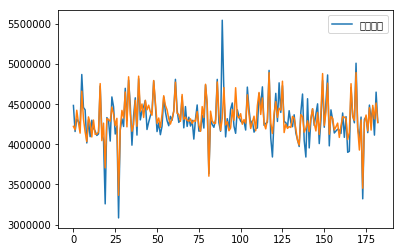

In [48]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure()
plt.plot(range(183),y_test)
plt.legend() 
plt.plot(range(183),y_pre)

In [46]:
y_test[:10]

118    4484454
445    4159650
582    4314448
784    4283993
181    4228250
631    4870530
132    4459493
803    4430455
867    4016905
492    4305968
Name: 总供水量, dtype: int64

In [42]:
X_train.shape

(729, 78)

In [36]:
list(y_pre)[:10]

[4223898.2,
 4181228.4,
 4424939.9,
 4269244.3,
 4139710.2,
 4662679.6,
 4316056.4,
 4156381.8,
 4034126.9,
 4341763.8]